# Introduction
This dataset includes crimes between 2019 and 2021.


<font color = 'blue'>
Content:
    
1. [Load and Check Data](#1)
1. [Variable Describtion](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Visualization](#8)

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/crime-rate-in-spain-2019-2021/crime_rate_Spain.csv


<a id = "1"></a><br>
# Load and Check Data

In [47]:
data = pd.read_csv("/kaggle/input/crime-rate-in-spain-2019-2021/crime_rate_Spain.csv")

In [48]:
data.head(10)

,Location,Year,Crime,Total cases
0,Barcelona,2021,Intentional homicides and consummated murders,36
1,Barcelona,2021,Intentional homicides and attempted murders,137
2,Barcelona,2021,Serious and less serious crimes of injuries an...,2161
3,Barcelona,2021,Kidnapping,8
4,Barcelona,2021,Crimes against freedom and sexual indemnity,2406
5,Barcelona,2021,Sexual assault with penetration,436
6,Barcelona,2021,Other crimes against freedom and sexual indemnity,1970
7,Barcelona,2021,Robbery with violence and intimidation,18360
8,Barcelona,2021,Burglaries with force in homes,16743
9,Barcelona,2021,Robberies with force in homes,10697


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     672 non-null    object
 1   Year         672 non-null    int64 
 2   Crime        672 non-null    object
 3   Total cases  672 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 21.1+ KB


In [50]:
data.columns

Index(['Location', 'Year', 'Crime', 'Total cases'], dtype='object')

In [51]:
data.Location.value_counts()

Barcelona    42
Madrid       42
Valencia     42
Murcia       42
Seville      42
Zaragoza     42
Malaga       42
Spain        42
Alicante     42
Cordoba      42
Granada      42
Rioja        42
Salamanca    42
Segovia      42
Ceuta        42
Melilla      42
Name: Location, dtype: int64

In [52]:
data.Crime.value_counts()

Intentional homicides and consummated murders                    48
Intentional homicides and attempted murders                      48
Serious and less serious crimes of injuries and riotous brawl    48
Kidnapping                                                       48
Crimes against freedom and sexual indemnity                      48
Sexual assault with penetration                                  48
Other crimes against freedom and sexual indemnity                48
Robbery with violence and intimidation                           48
Burglaries with force in homes                                   48
Robberies with force in homes                                    48
Theft                                                            48
Vehicle theft                                                    48
Drug trafficking                                                 48
Other criminal offenses                                          48
Name: Crime, dtype: int64

In [53]:
data.dtypes

Location       object
Year            int64
Crime          object
Total cases     int64
dtype: object

In [54]:
data.describe()

,Year,Total cases
count,672.000000,672.000000
mean,2020.000000,5786.104167
std,0.817105,21325.054204
min,2019.000000,0.000000
25%,2019.000000,39.750000
50%,2020.000000,326.500000
75%,2021.000000,1779.250000
max,2021.000000,205312.000000


In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,672.0,2020.000000,0.817105,2019.0,2019.00,2020.0,2021.00,2021.0
Total cases,672.0,5786.104167,21325.054204,0.0,39.75,326.5,1779.25,205312.0


In [56]:
#data['Total cases'] = data['Total cases'].astype(float)

<a id = "2"></a><br>
# Variable Description
1. Location: Crime location
1. Year: Time of crimes 
1. Crime: Types of crimes
1. Total cases: Total number of cases

<a id = "3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Location , Crime
* Numerical Variable: Year , Total cases

<a id = "4"></a><br>
## Categorical Variable

In [57]:
def bar_plot(variable):
    var = data[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation = 90)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

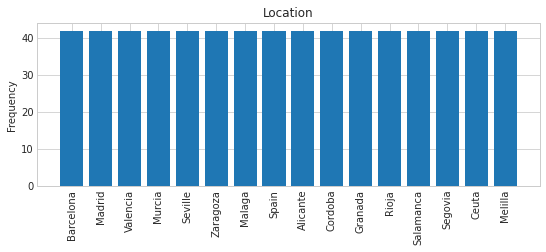

Location: 
 Barcelona    42
Madrid       42
Valencia     42
Murcia       42
Seville      42
Zaragoza     42
Malaga       42
Spain        42
Alicante     42
Cordoba      42
Granada      42
Rioja        42
Salamanca    42
Segovia      42
Ceuta        42
Melilla      42
Name: Location, dtype: int64


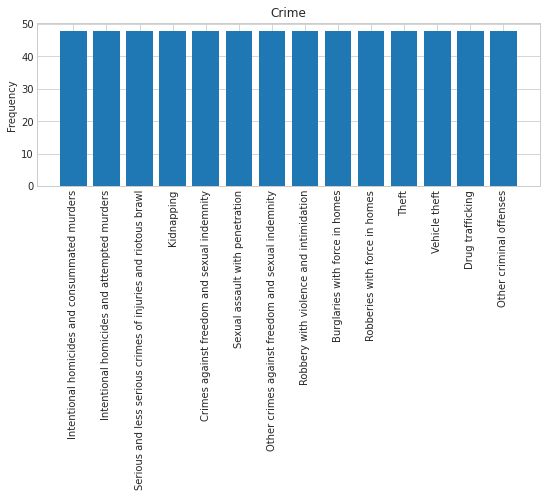

Crime: 
 Intentional homicides and consummated murders                    48
Intentional homicides and attempted murders                      48
Serious and less serious crimes of injuries and riotous brawl    48
Kidnapping                                                       48
Crimes against freedom and sexual indemnity                      48
Sexual assault with penetration                                  48
Other crimes against freedom and sexual indemnity                48
Robbery with violence and intimidation                           48
Burglaries with force in homes                                   48
Robberies with force in homes                                    48
Theft                                                            48
Vehicle theft                                                    48
Drug trafficking                                                 48
Other criminal offenses                                          48
Name: Crime, dtype: int64


In [58]:
category1 = ["Location" , "Crime"]
for c in category1:
    bar_plot(c)

<a id = "5"></a><br>
## Numerical Variable

In [59]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

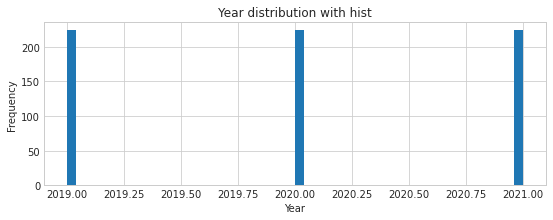

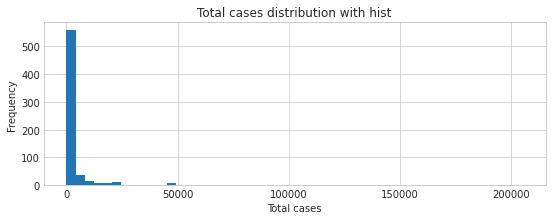

In [60]:
numericVar = ["Year","Total cases"]
for n in numericVar:
    plot_hist(n)

<a id = "6"></a><br>
# Basic Data Analysis

* Location - Total cases
* Crime - Total cases
* Year - Total cases

In [61]:
data[["Location","Total cases"]].groupby(["Location"], as_index = False).mean().sort_values(by="Total cases",ascending = False)

,Location,Total cases
5,Madrid,25955.333333
1,Barcelona,23457.976190
14,Valencia,8631.523810
0,Alicante,6062.690476
12,Seville,5812.571429
6,Malaga,5493.952381
8,Murcia,4200.547619
13,Spain,2759.071429
15,Zaragoza,2344.023810
4,Granada,2322.857143


In [62]:
data[["Crime","Total cases"]].groupby(["Crime"], as_index = False).mean().sort_values(by="Total cases",ascending = False)

,Crime,Total cases
7,Other criminal offenses,43843.958333
12,Theft,23808.645833
0,Burglaries with force in homes,3535.208333
8,Robberies with force in homes,3143.958333
9,Robbery with violence and intimidation,2801.854167
13,Vehicle theft,1345.604167
2,Drug trafficking,681.395833
10,Serious and less serious crimes of injuries an...,663.416667
1,Crimes against freedom and sexual indemnity,566.354167
6,Other crimes against freedom and sexual indemnity,495.625000


In [63]:
data[["Year","Total cases"]].groupby(["Year"], as_index = False).mean().sort_values(by="Total cases",ascending = False)

,Year,Total cases
0,2019,6562.745536
2,2021,5803.651786
1,2020,4991.915179


In [64]:
pd.DataFrame(data.groupby(['Location']).agg({'Total cases': ['min', 'max']}))

Total cases        
                  min     max
Location                     
Alicante            2   49211
Barcelona           2  165901
Ceuta               0    3179
Cordoba             0   16675
Granada             0   21570
Madrid             10  205312
Malaga              5   47803
Melilla             0    3577
Murcia              1   37088
Rioja               0    6309
Salamanca           0    6600
Segovia             0   24015
Seville             5   48461
Spain               1   23066
Valencia            2   74380
Zaragoza            0   21357

In [65]:
pd.DataFrame(data.groupby(['Crime']).agg({'Total cases': ['min', 'max']}))

Total cases        
                                                           min     max
Crime                                                                 
Burglaries with force in homes                              56   23986
Crimes against freedom and sexual indemnity                 23    2420
Drug trafficking                                            43    2833
Intentional homicides and attempted murders                  2     142
Intentional homicides and consummated murders                0      45
Kidnapping                                                   0      16
Other crimes against freedom and sexual indemnity           22    2146
Other criminal offenses                                   2558  205312
Robberies with force in homes                               31   16180
Robbery with violence and intimidation                      24   23836
Serious and less serious crimes of injuries and...          37    2717
Sexual assault with penetration                              1     436
Theft                                                      434  165901
Vehicle theft                                               20    8392

In [66]:
data[data['Crime'].str.contains("Rob")].groupby('Year')['Total cases'].sum()

Year
2019    114643
2020     81397
2021     89359
Name: Total cases, dtype: int64

In [67]:
data[data['Crime'].str.contains("Kidnapping")].groupby('Year')['Total cases'].sum()

Year
2019    53
2020    44
2021    56
Name: Total cases, dtype: int64

In [68]:
print(data.groupby(['Location','Year'])['Total cases'].sum())

Location   Year
Alicante   2019     96523
           2020     72732
           2021     85378
Barcelona  2019    404552
           2020    270214
           2021    310469
Ceuta      2019      4854
           2020      3712
           2021      4004
Cordoba    2019     26617
           2020     21938
           2021     24290
Granada    2019     35446
           2020     28840
           2021     33274
Madrid     2019    423399
           2020    310194
           2021    356531
Malaga     2019     84583
           2020     66451
           2021     79712
Melilla    2019      5716
           2020      4545
           2021      4208
Murcia     2019     63248
           2020     50969
           2021     62206
Rioja      2019      9341
           2020      8268
           2021      9573
Salamanca  2019     10320
           2020      8520
           2021      9943
Segovia    2019      4700
           2020     35489
           2021     36521
Seville    2019     91186
           2020     72

<a id = "7"></a><br>
# Outlier Detection

In [69]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        q1 = np.percentile(df[c],25)
        q3 = np.percentile(df[c],75)
        iqr = q3 - q1
        outlier_step = iqr * 1.5
         
        outlier_list_col = df[(df[c] < q1 - outlier_step) | (df[c] > q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
        

In [70]:
data.loc[detect_outliers(data,["Total cases","Year"])]

,Location,Year,Crime,Total cases


#### If we have outliers variable we should drop outliers from data.

In [71]:
# data = data.drop(detect_outliers(data,["Total cases","Year"]),axis = 0).reset_index(drop = True)

<a id = "8"></a><br>
# Visualization

### Correlation Between Total cases -- Crime -- Year -- Location   

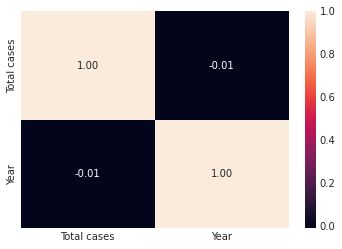

In [72]:
list1 = ["Total cases","Year","Crime","Location"]
sns.heatmap(data[list1].corr(), annot = True, fmt = ".2f")
plt.show()

In [73]:
px.bar(data[0:20], x='Crime', y='Total cases')

In [74]:
px.scatter(data, x='Crime', y='Year', color='Total cases', color_discrete_sequence=['red', 'blue'])

[2019 2020 2021]


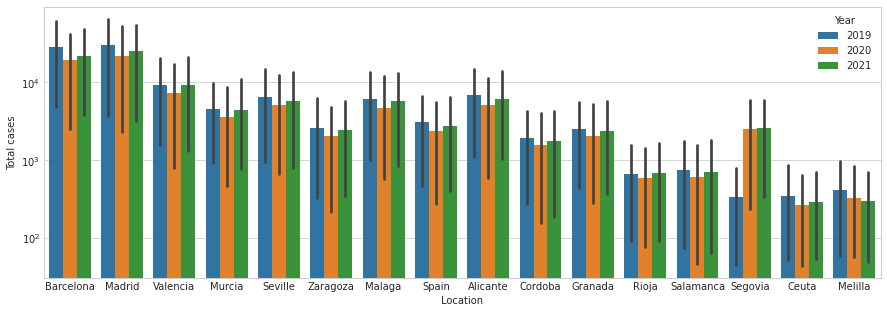

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Location', y='Total cases', hue='Year', log=True)

print(np.unique(data[['Year', 'Year']].values))